In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Salary_Data_Cleaned.csv')

In [4]:
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company_text,jobs_state,same_state,comapny_age,python_yn,r_yn,excel_yn,aws_yn,spark_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,50,1,0,1,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,39,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,13,1,0,1,0,1


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'jobs_state', 'same_state', 'comapny_age', 'python_yn',
       'r_yn', 'excel_yn', 'aws_yn', 'spark_yn'],
      dtype='object')

In [6]:
# Simplification of title and positions
def simplify_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr' in title.lower()or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [7]:
df['job_simp'] = df['Job Title'].apply(simplify_title)

In [8]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)

In [10]:
df.seniority.value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [11]:
# Fixing LA state
df['jobs_state'] = df['jobs_state'].apply(lambda x: 'CA' if x.strip().lower() == 'los angeles' else x.strip())
df.jobs_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: jobs_state, dtype: int64

In [12]:
# Job Description Lenght
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [13]:
# Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [15]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [16]:
# Hourly wage to annual wage
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [17]:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [18]:
# Removing '\n' character from Comapany_text column
df.Company_text

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: Company_text, Length: 742, dtype: object

In [19]:
df['Company_text'] = df['Company_text'].apply(lambda x: x[:-1])

In [20]:
df['Company_text']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company_text, Length: 742, dtype: object

In [21]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,comapny_age,python_yn,r_yn,excel_yn,aws_yn,spark_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.002695,0.522911,0.237197,0.225067,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.051882,0.499812,0.425651,0.417908,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'jobs_state', 'same_state', 'comapny_age', 'python_yn',
       'r_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

<AxesSubplot:>

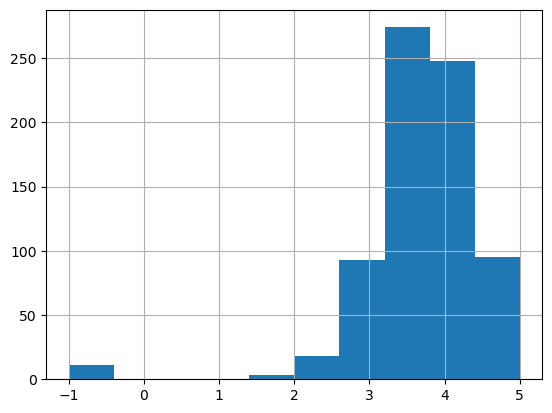

In [23]:
df.Rating.hist()

<AxesSubplot:>

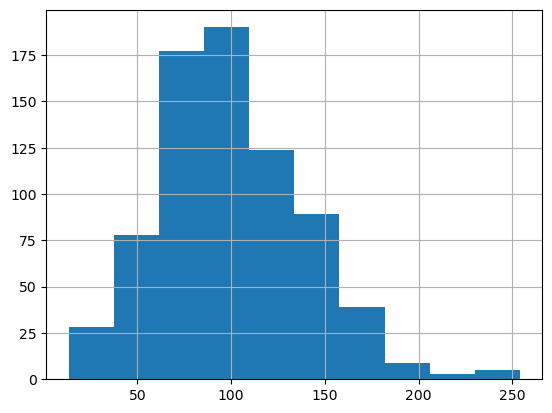

In [24]:
df.avg_salary.hist()

In [25]:
df['Company_age'] = df.comapny_age

<AxesSubplot:>

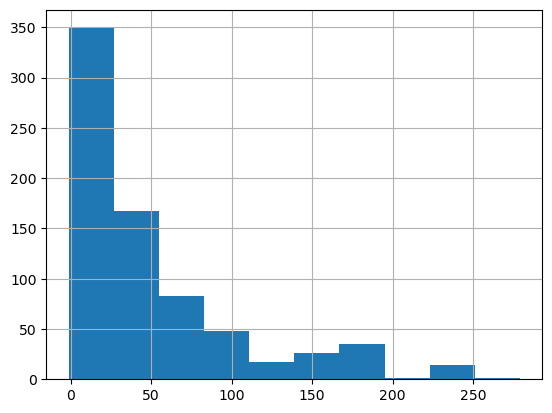

In [26]:
df['Company_age'].hist()

<AxesSubplot:>

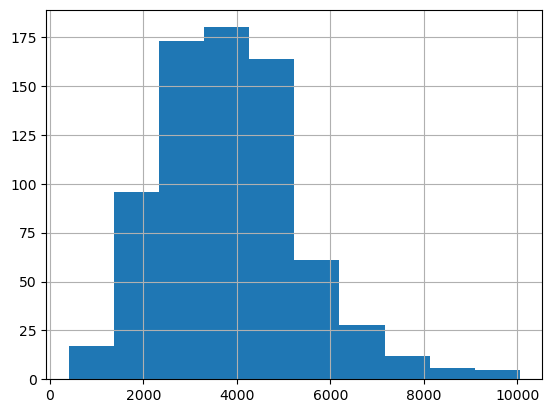

In [27]:
df['desc_len'].hist()

<AxesSubplot:>

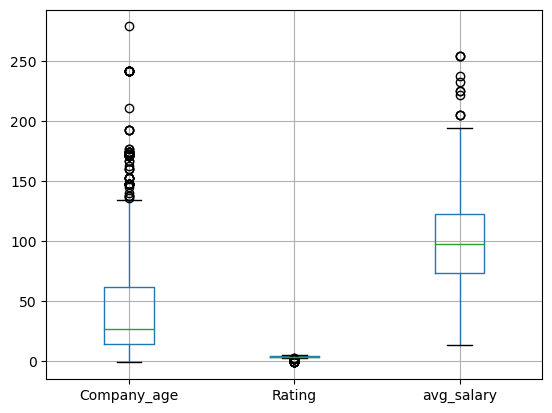

In [28]:
df.boxplot(column = ['Company_age', 'Rating', 'avg_salary'])

<AxesSubplot:>

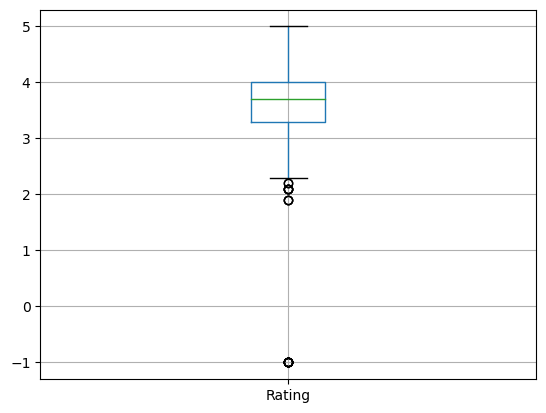

In [29]:
df.boxplot(column = 'Rating')

In [30]:
# Correlating columns
df[['Company_age', 'avg_salary', 'Rating', 'desc_len']].corr()

,Company_age,avg_salary,Rating,desc_len
Company_age,1.000000,0.019410,0.026164,0.164730
avg_salary,0.019410,1.000000,0.013492,0.078808
Rating,0.026164,0.013492,1.000000,-0.012281
desc_len,0.164730,0.078808,-0.012281,1.000000


<AxesSubplot:>

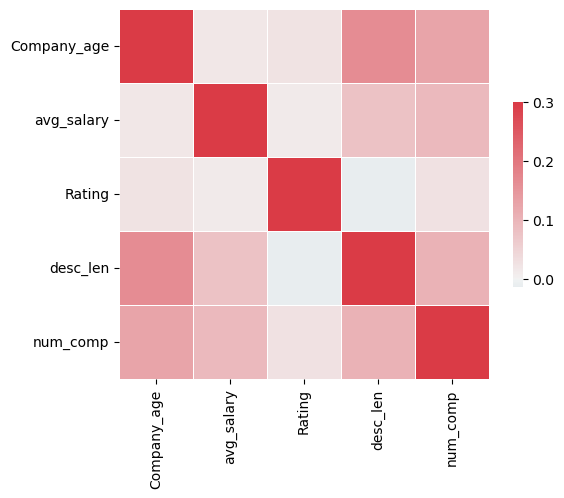

In [33]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Company_age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'jobs_state', 'same_state', 'comapny_age', 'python_yn',
       'r_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp', 'seniority',
       'desc_len', 'num_comp', 'Company_age'],
      dtype='object')

In [40]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_text', 'jobs_state',
             'same_state', 'python_yn', 'r_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp', 'seniority']]

Graph for Location  Total: 200


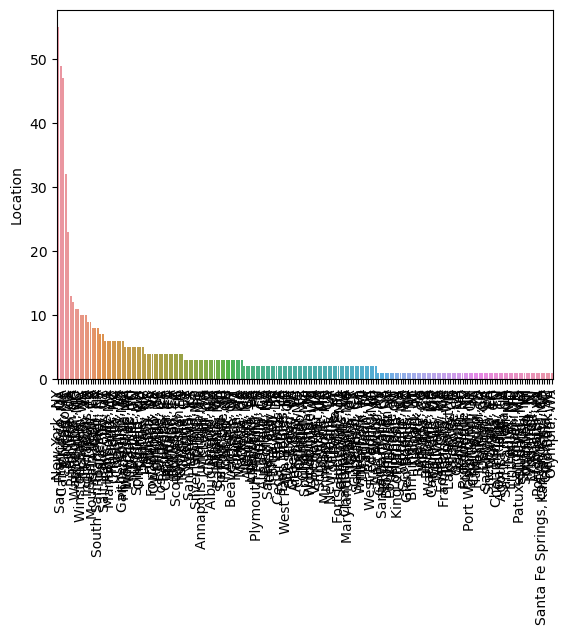

Graph for Headquarters  Total: 198


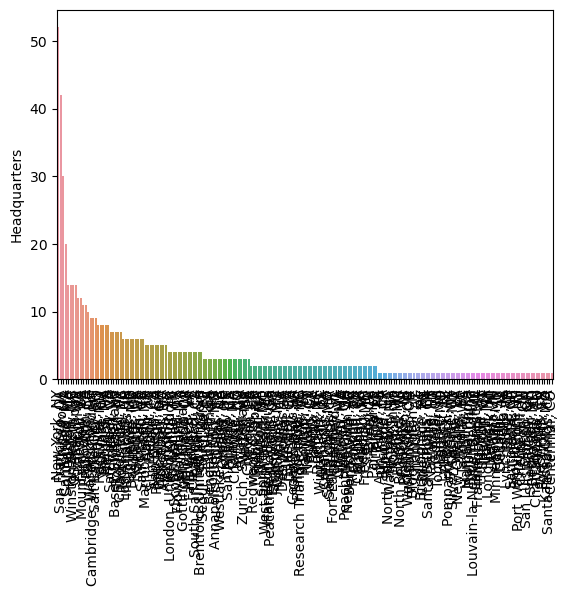

Graph for Size  Total: 9


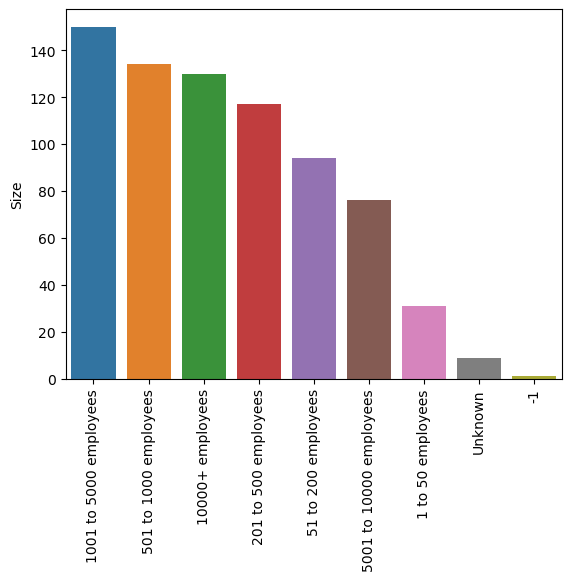

Graph for Type of ownership  Total: 11


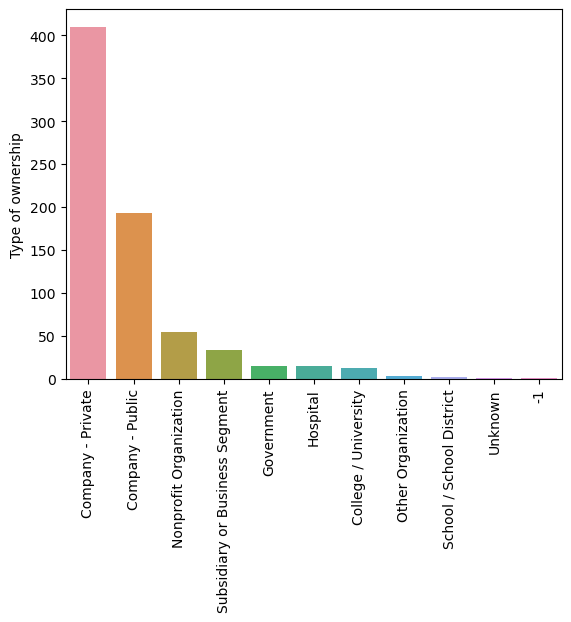

Graph for Industry  Total: 60


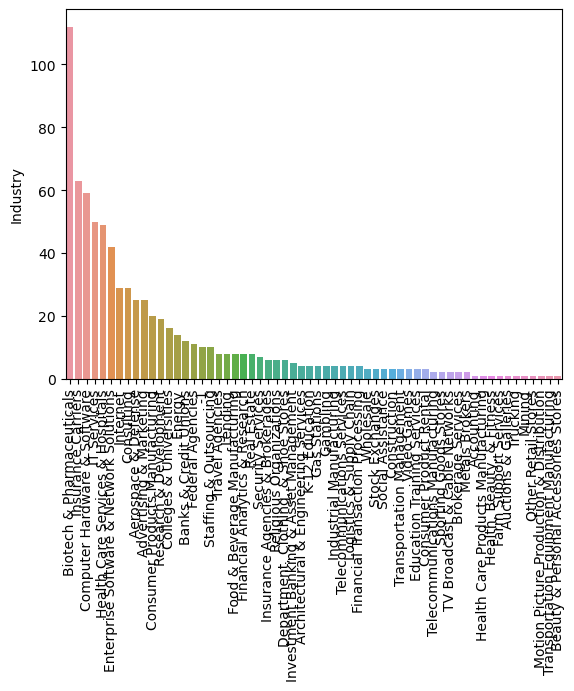

Graph for Sector  Total: 25


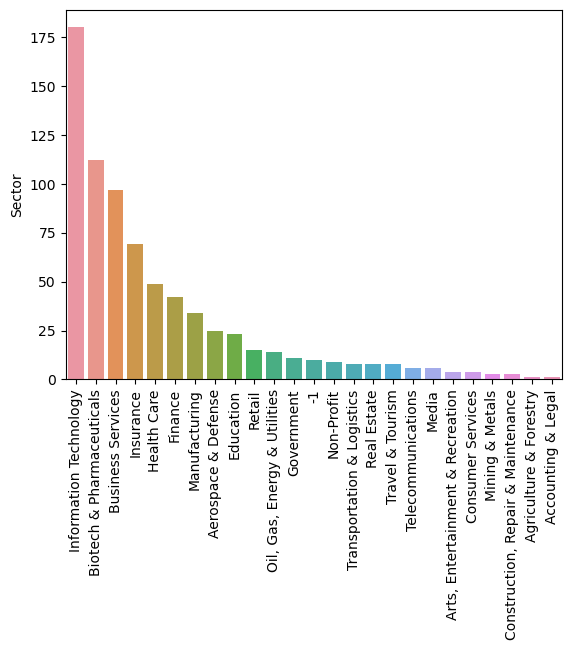

Graph for Revenue  Total: 14


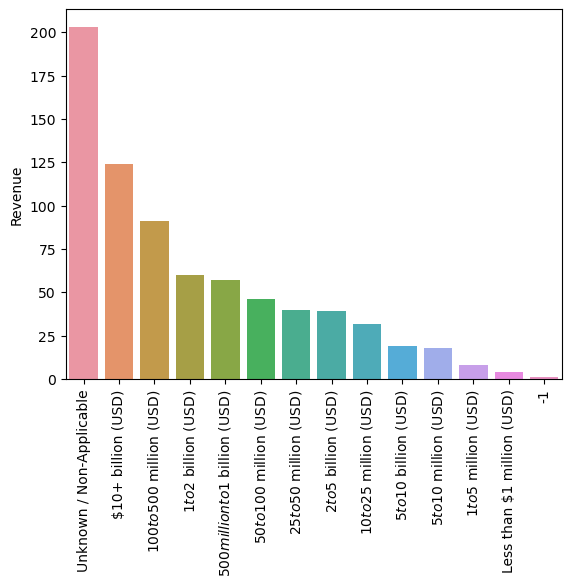

Graph for Company_text  Total: 343


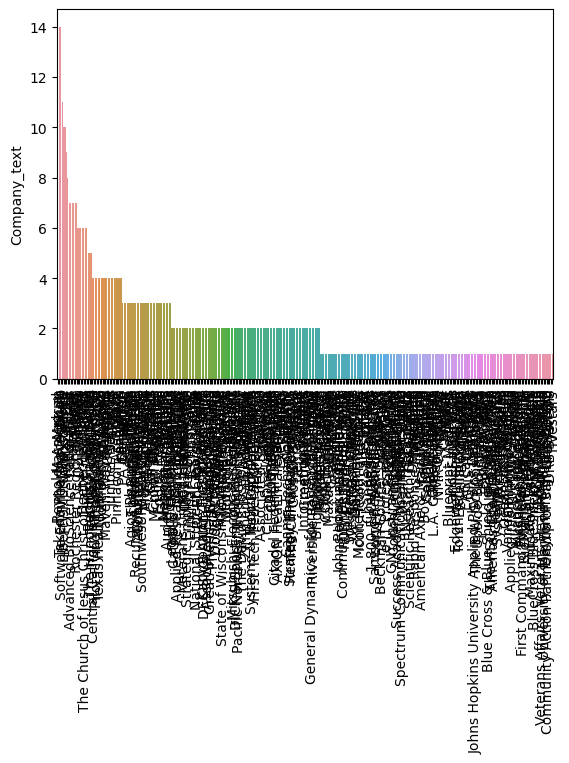

Graph for jobs_state  Total: 37


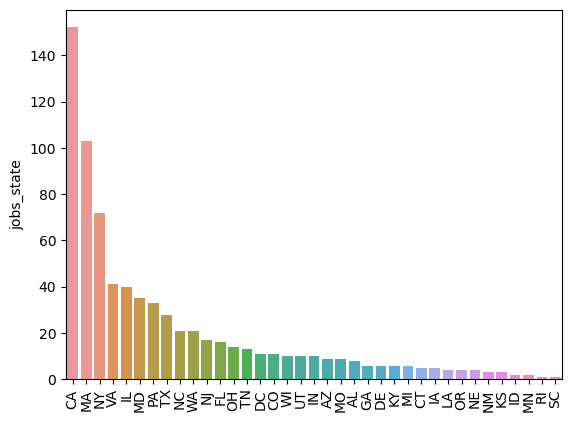

Graph for same_state  Total: 2


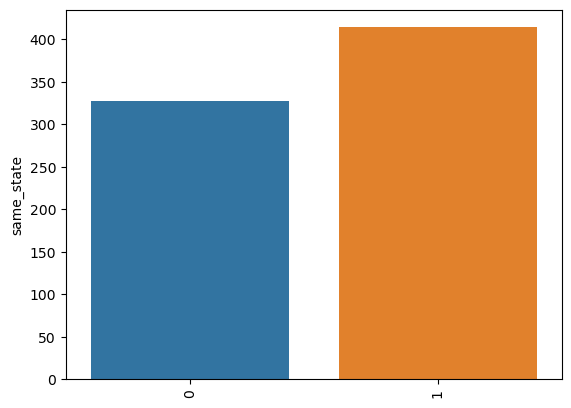

Graph for python_yn  Total: 2


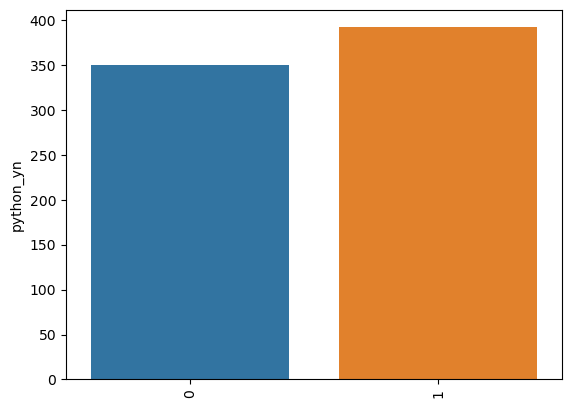

Graph for r_yn  Total: 2


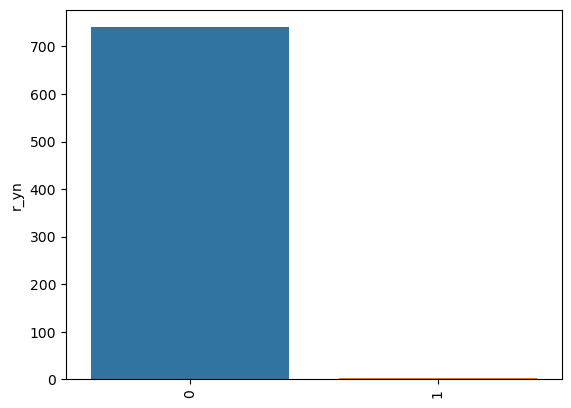

Graph for excel_yn  Total: 2


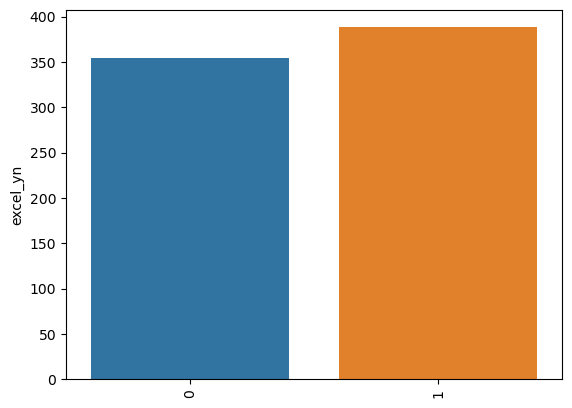

Graph for aws_yn  Total: 2


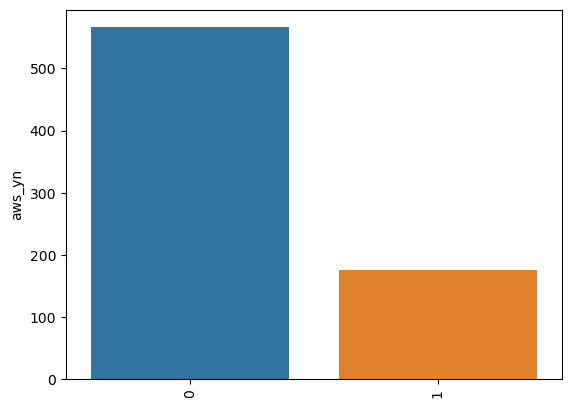

Graph for spark_yn  Total: 2


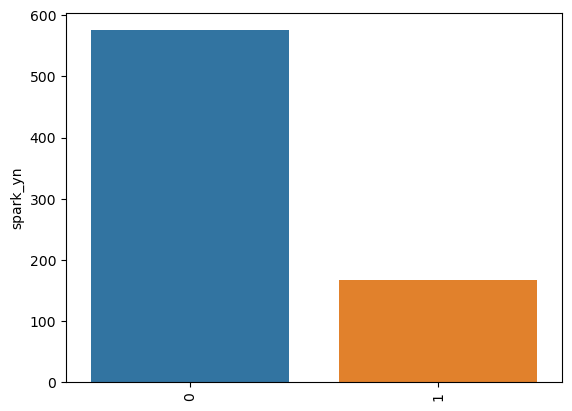

Graph for job_simp  Total: 7


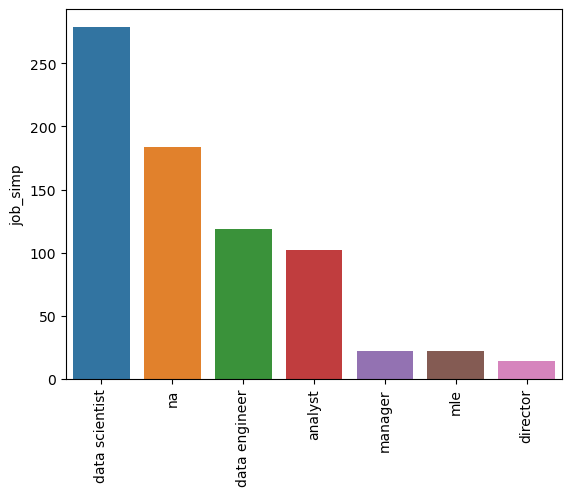

Graph for seniority  Total: 3


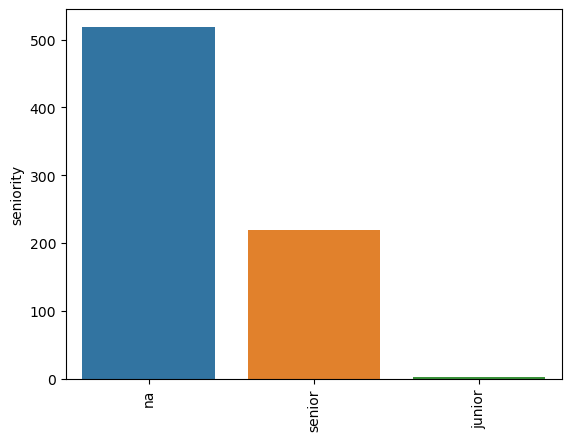

In [61]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s  Total: %d' % (i, len(cat_num)) )
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation = 90, fontsize=10)
    plt.show()

Graph for Location  Total: 20


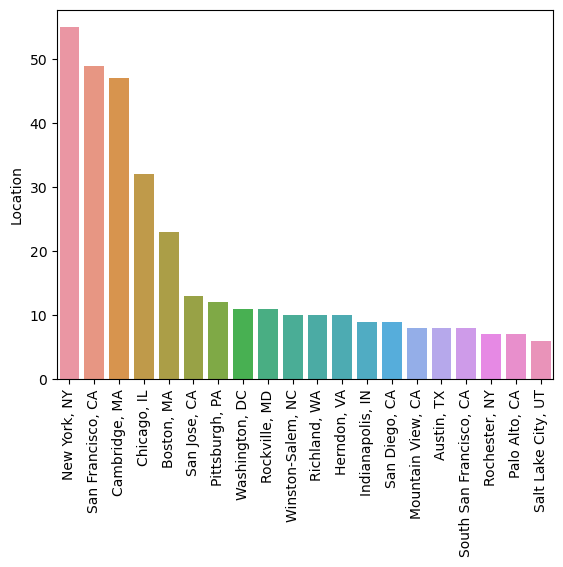

Graph for Headquarters  Total: 20


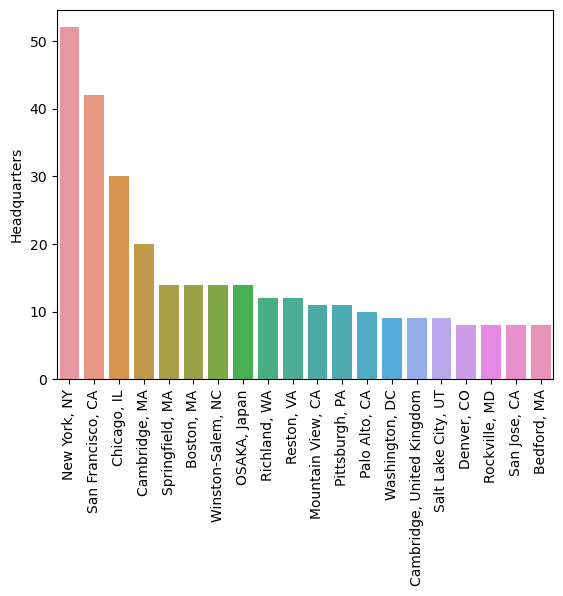

Graph for Company_text  Total: 20


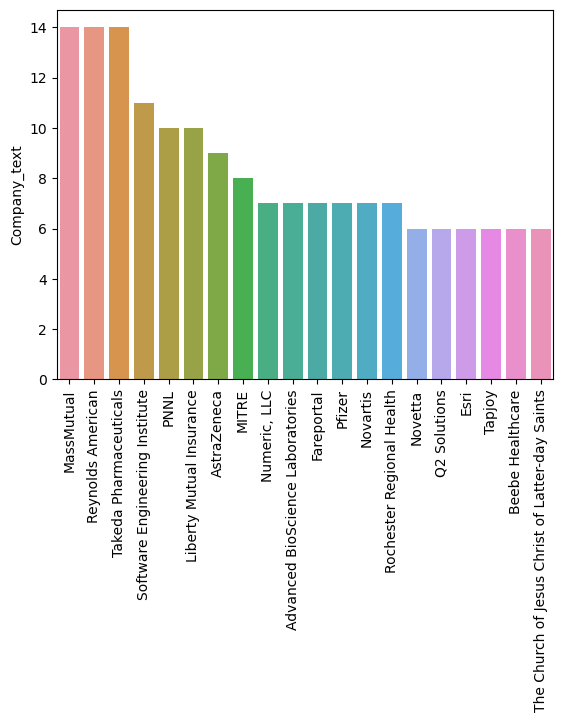

In [64]:
for i in df_cat[['Location', 'Headquarters', 'Company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s  Total: %d' % (i, len(cat_num)) )
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation = 90, fontsize=10)
    plt.show()

In [65]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'jobs_state', 'same_state', 'comapny_age', 'python_yn',
       'r_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp', 'seniority',
       'desc_len', 'num_comp', 'Company_age'],
      dtype='object')

In [66]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [72]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        junior      53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [80]:
pd.set_option('display.max_rows', None)

In [78]:
pd.pivot_table(df, index = ['jobs_state'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
jobs_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [92]:
pd.pivot_table(df, index = ['jobs_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('jobs_state', ascending = True)

avg_salary
jobs_state job_simp                  
AL         analyst                  5
           data engineer            1
           na                       2
AZ         analyst                  1
           data engineer            5
           data scientist           1
           na                       2
CA         mle                      5
           manager                  9
           na                      27
           data engineer           25
           analyst                 18
           data scientist          68
CO         analyst                  1
           data engineer            3
           data scientist           3
           mle                      1
           na                       3
CT         data scientist           2
           na                       3
DC         analyst                  2
           data engineer            4
           data scientist           5
DE         na                       6
FL         data engineer            3
           data scientist           7
           analyst                  6
GA         data scientist           3
           na                       3
IA         analyst                  2
           data engineer            3
ID         analyst                  2
IL         na                       6
           analyst                  3
           data engineer            8
           data scientist          15
           director                 6
           mle                      2
IN         na                       4
           data scientist           2
           data engineer            4
KS         mle                      3
KY         data scientist           2
           na                       4
LA         analyst                  1
           data engineer            2
           na                       1
MA         manager                  5
           director                 6
           na                      46
           data engineer           12
           analyst                  4
           data scientist          30
MD         data scientist          13
           na                      16
           analyst                  3
           data engineer            3
MI         data scientist           4
           manager                  2
MN         analyst                  1
           data engineer            1
MO         analyst                  2
           data scientist           3
           manager                  1
           na                       3
NC         data engineer            6
           data scientist           3
           na                      12
NE         na                       4
NJ         na                       1
           manager                  2
           director                 2
           data engineer            2
           data scientist           4
           analyst                  6
NM         data scientist           3
NY         analyst                 14
           data engineer            4
           data scientist          40
           mle                      2
           na                      12
OH         na                       3
           analyst                  4
           data scientist           7
OR         data scientist           3
           data engineer            1
PA         analyst                  8
           data engineer            1
           data scientist           6
           manager                  3
           mle                      7
           na                       8
RI         analyst                  1
SC         na                       1
TN         analyst                  2
           data engineer           10
           data scientist           1
TX         data scientist          13
           na                       7
           data engineer            8
UT         analyst                  4
           data engineer            3
           data scientist           3
VA         analyst                  6

In [99]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'jobs_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
jobs_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [100]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'jobs_state', 'same_state', 'comapny_age', 'python_yn',
       'r_yn', 'excel_yn', 'aws_yn', 'spark_yn', 'job_simp', 'seniority',
       'desc_len', 'num_comp', 'Company_age'],
      dtype='object')

In [105]:
# Rating, Industry, Sector, Revenue, hourly, number of comp., employer provided, python, r, aws, spark, excel, desc_len, type of ownership

In [112]:
df_pivot = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership', 'avg_salary' ]]


In [117]:
for i in df_pivot.columns:
    print(i)
    print( pd.pivot_table(df_pivot, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False) )

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [118]:
pd.pivot_table(df_pivot, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [120]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.8 MB/s eta 0:00:00


In [121]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [125]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [127]:
df_out = df

In [128]:
df_out.to_csv('eda_data.csv', index = False)

In [129]:
pd.read_csv('eda_data.csv')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_yn,r_yn,excel_yn,aws_yn,spark_yn,job_simp,seniority,desc_len,num_comp,Company_age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,1,0,0,data scientist,na,2536,0,50
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,data scientist,na,4783,0,39
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,1,0,1,data scientist,na,3461,0,13
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,0,0,0,0,data scientist,na,3883,3,58
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,1,0,0,data scientist,na,2728,3,25
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,1,0,1,1,0,data scientist,na,3747,3,23
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,...,0,0,1,0,0,data scientist,na,1786,0,15
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,...,1,0,1,1,1,data scientist,na,3804,0,18
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,0,0,0,0,0,na,na,1538,0,9
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,...,1,0,0,0,1,data scientist,na,4574,2,14
